# Zonal Mean Temperature

Calculating the zonal mean of a quantity

In [7]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt

In [12]:
expts = cc.get_experiments('mom01v5')

Zonal mean allow us to look at the ocean in cross-section. In this diagnostics, we calculate the time averaged, zonal mean temperature field.

In [13]:
def calc_zonal_mean_temp(expt, n=1):
    print('Calculating {} zonal_mean_temp'.format(expt))
    
    if expt == 'mom01v5/KDS75':
        ncfile = 'ocean_month.nc'
    else:
        ncfile = 'ocean.nc'
        
    zonal_temp = get_nc_variable(expt, ncfile, 'temp',
                                 chunks={'st_ocean': None},
                                 n=n)
    
    zonal_mean_temp = zonal_temp.mean('xt_ocean').mean('time')
    
    zonal_mean_temp.load()
    
    return zonal_mean_temp

In this example, we assume that the cells are all of the same thickness in the $x$ direction. It would be accurate to perform a weighted average using the `dzt` field.

In [14]:
def plot_zonal_mean_temp(zonal_mean_temp):
    zonal_mean_temp.plot()
    plt.gca().invert_yaxis()
    plt.title('{}: Zonal Mean Temp'.format(expt))

Calculating GFDL50 zonal_mean_temp


/home/156/jm0634/cosima-cookbook/cosima_cookbook/netcdf_index.py:222: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Calculating KDS75 zonal_mean_temp
Calculating KDS75_PI zonal_mean_temp
Calculating KDS75_UP zonal_mean_temp
Calculating KDS75_WOA13 zonal_mean_temp
Calculating KDS75_salt10days zonal_mean_temp


ValueError: No variable temp found for KDS75_salt10days in ocean.nc

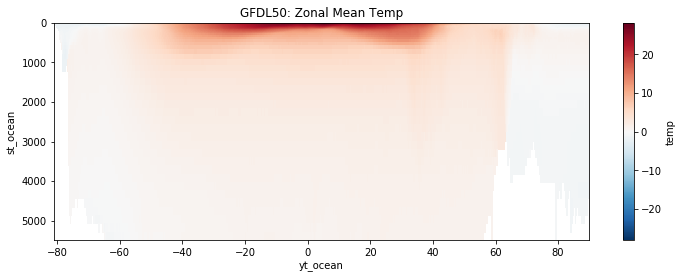

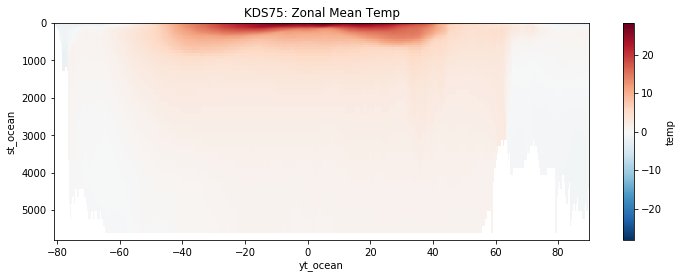

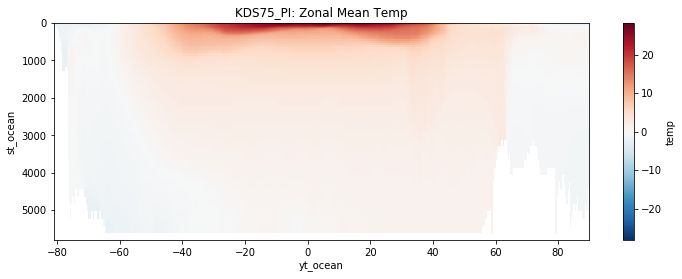

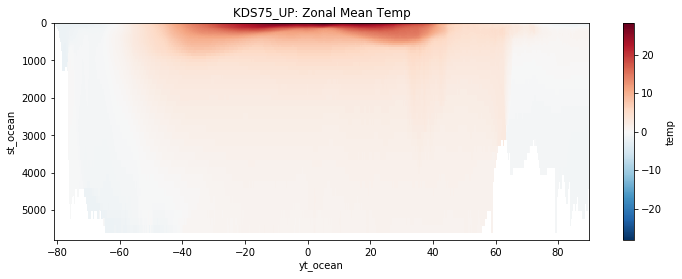

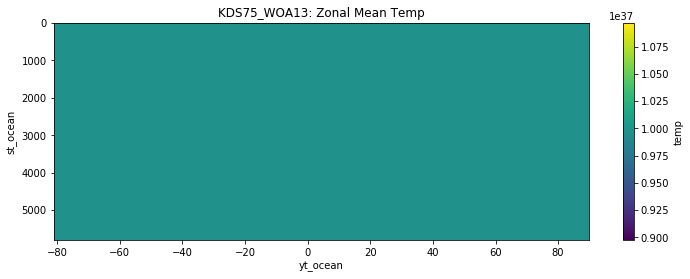

In [15]:
for expt in expts: 
    plt.figure(figsize=(12,4))
    zonal_mean_temp = calc_zonal_mean_temp(expt)
    plot_zonal_mean_temp(zonal_mean_temp)

In [7]:
zonal_temp

<xarray.DataArray 'temp' (time: 6, st_ocean: 75, yt_ocean: 2700, xt_ocean: 3600)>
dask.array<concatenate, shape=(6, 75, 2700, 3600), dtype=float64, chunksize=(1, 75, 300, 400)>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 -279.6 -279.5 -279.4 ...
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 -80.98 -80.94 -80.9 ...
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 4.332 5.869 7.569 9.447 ...
  * time      (time) object  109-07-16 12:00:00  109-08-16 12:00:00 ...
    geolon_t  (time, yt_ocean, xt_ocean) float64 nan nan nan nan nan nan nan ...
    geolat_t  (time, yt_ocean, xt_ocean) float64 nan nan nan nan nan nan nan ...
Attributes:
    long_name:      Potential temperature
    units:          degrees C
    valid_range:    [ -10.  500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature